### Student Information
Name: Suraj Dengale

Student ID: 110061423

GitHub ID: snd-ml (https://github.com/snd-ml)

Kaggle name: Suraj

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_dataset_counts = train_count_vect.fit_transform(train_df.text)
test_dataset_counts = test_count_vect.fit_transform(test_df.text)
train_term_frequencies = np.asarray(train_dataset_counts.sum(axis=0))[0]
test_term_frequencies = np.asarray(test_dataset_counts.sum(axis=0))[0]
df = pd.DataFrame(train_term_frequencies[:30])
tf = pd.DataFrame((df).values,index=train_count_vect.get_feature_names_out()[:30], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=train_count_vect.get_feature_names_out()[:30])
print(fig.show())


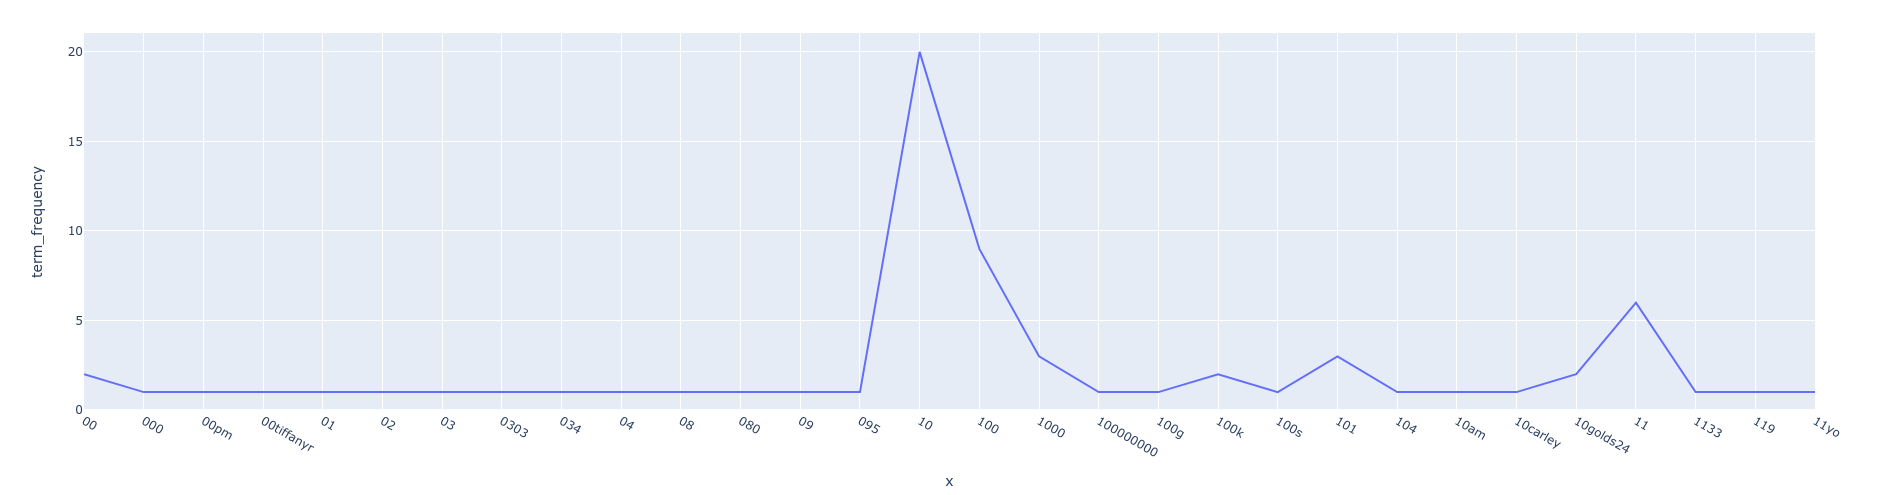

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [25]:
# Answer here
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
trainf = tfidf.fit_transform(train_df['text'])
testf = tfidf.transform(test_df['text'])
trainf.shape

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(3613, 1000)

In [26]:
feature_names_tfidf = tfidf.get_feature_names()
feature_names_tfidf[100:110]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [32]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

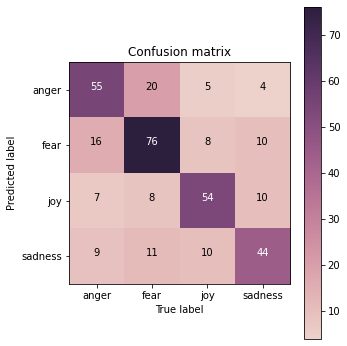

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here


The model had a greater accuracy in predicting data labeled 'joy'. The performing class in the sadness label is poor. The model has a very high chances of predicting fear. The model predicts - 55 anger , 76 fear , 54 joy , 44 sadness .

Because of the overfitting problem, the decision tree remembered multiple critical terms, causing the prediction to be inadequate as we can see there is a difference between training and testing dataset. I also belive there is going to be outliers e.g few people trying to use certain physological tenchiques like sarcasm etc. which might be identified as joy or anger but needs not to be true.

We might try to come up with some pre-processing activities to assist us distinguish fear from the rest of the emotions. 


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [34]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [36]:
from sklearn.naive_bayes import MultinomialNB
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

mnb = MultinomialNB()
mnb = mnb.fit(X_train, y_train)

y_train_pred_mnb = mnb.predict(X_train)
y_test_pred_mnb = mnb.predict(X_test)

y_test_pred_mnb[:10]

array(['joy', 'anger', 'fear', 'sadness', 'fear', 'sadness', 'fear',
       'fear', 'joy', 'joy'], dtype='<U7')

In [37]:
from sklearn.metrics import accuracy_score

acc_train_mnb = accuracy_score(y_true=y_train, y_pred=y_train_pred_mnb)
acc_test_mnb = accuracy_score(y_true=y_test, y_pred=y_test_pred_mnb)

print("Naive Bayes training accuracy score : "+str('{:4.2f}'.format(acc_train_mnb)))
print("Naive Bayes testing accuracy score : "+str('{:4.2f}'.format(acc_test_mnb)))

Naive Bayes training accuracy score : 0.79
Naive Bayes testing accuracy score : 0.70


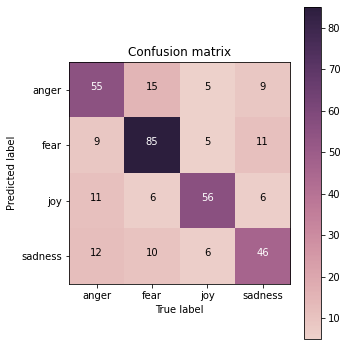

In [38]:
from sklearn.metrics import confusion_matrix

cm_mnb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_mnb) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_mnb, classes=my_tags, title='Confusion matrix')

In [39]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [40]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [41]:
X_train_d = X_train.toarray()

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

#Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_train_d, y_train)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [43]:
gs_NB.best_score_

0.7063383690353494

In [44]:
X_test_d = X_test.toarray()

In [45]:
y_train_pred_model = gs_NB.predict(X_train_d)
y_test_pred_model = gs_NB.predict(X_test_d)

In [46]:
acc_train_model = accuracy_score(y_true=y_train, y_pred=y_train_pred_model)
acc_test_model = accuracy_score(y_true=y_test, y_pred=y_test_pred_model)

print("Naive Bayes training accuracy score : "+str('{:4.2f}'.format(acc_train_model)))
print("Naive Bayes testing accuracy score : "+str('{:4.2f}'.format(acc_test_model)))

Naive Bayes training accuracy score : 0.79
Naive Bayes testing accuracy score : 0.69


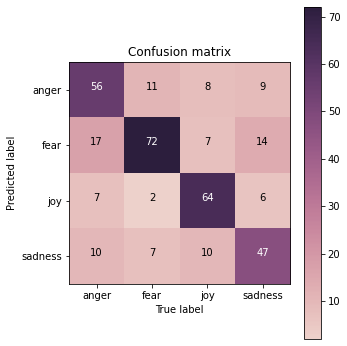

In [47]:
from sklearn.metrics import confusion_matrix

cm_mnb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_model) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_mnb, classes=my_tags, title='Confusion matrix')

### Observation
- As we can clearly see even if the accuracy of model is reduced the recall for class joy is increased
- However the recall for class fear is reduced a little
- This shows us that even if the model's accuracy is not increased it has been well generalised.
- It also shows us that Accuracy as a metric for model performance might not be the most optimum solution every time.

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
The above accuracy data demonstrate that Decision Tree has a very high training accuracy ( but Multinomial Naive Bayes has a lower training accuracy. The Decision Tree model infers rules from the training dataset by dividing it into subsets based on specified attributes ). As a result, it's common to have a high training accuracy because the tree might be seen to be representing the whole training dataset. Naive Bayesian classifier operates on a key assumption, class conditional independence, training accuracy of is a normal and conventional outcome. Because there are relationships between variables in practice, the Naive Bayesian classifier cannot model them in this scenario.I think that's why accuacy is low.

Both the Decision Tree and the Naive Bayes Model yielded confusion matrices. Given that both models employ the identical BOW 500 vectorizer (Bag of Words with 500 features), we can see that Naive Bayes outperforms Decision Tree in terms of train/test accuracy. This indicates that the decision tree models are overfitted. Overfitting is an issue that may arise in both models; but, in the case of Decision Trees, it can be handled by pruning. Furthermore, Naive Bayes produces a higher F1-score for all labels.


In [48]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [49]:
## deal with label (string -> one-hot)
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 248       anger
2856    sadness
47        anger
3604    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [50]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [52]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

2022-11-21 14:19:39.151016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 14:19:39.152319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 14:19:39.157836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 14:19:39.158974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 14:19:39.160077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

2022-11-21 14:19:39.163719: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 14:19:39.437889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 14:19:39.438925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 14:19:39.439773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

### 6.4 Train

In [53]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.

2022-11-21 14:19:49.536078: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


113/113 [==============================] - 3s 5ms/step - loss: 1.3330 - accuracy: 0.3601 - val_loss: 1.2656 - val_accuracy: 0.4409
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 0.9946 - accuracy: 0.6418 - val_loss: 0.9044 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 1s 5ms/step - loss: 0.5743 - accuracy: 0.7974 - val_loss: 0.8015 - val_accuracy: 0.6801
Epoch 4/25
113/113 [==============================] - 1s 5ms/step - loss: 0.4064 - accuracy: 0.8577 - val_loss: 0.7908 - val_accuracy: 0.7032
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.8862 - val_loss: 0.8411 - val_accuracy: 0.6974
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.9153 - val_loss: 0.8998 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.9330 - val_loss: 0.9259 - val_accuracy: 0.6945
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [54]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.2997171e-07, 6.3067819e-05, 9.9993622e-01, 7.4044820e-08],
       [9.9947208e-01, 1.2095982e-05, 9.9259189e-05, 4.1653839e-04],
       [8.2929768e-03, 9.9072134e-01, 3.9847153e-05, 9.4589259e-04],
       [6.4425301e-08, 2.0122112e-05, 7.8103207e-14, 9.9997985e-01],
       [6.9550723e-02, 9.2768848e-01, 2.0827067e-03, 6.7811896e-04]],
      dtype=float32)

In [55]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'fear', 'sadness', 'fear'], dtype=object)

In [56]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [57]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.360089,1.332956,0.440922,1.265615
1,1,0.641849,0.994578,0.659942,0.904426
2,2,0.797398,0.574261,0.680115,0.801548
3,3,0.857736,0.406410,0.703170,0.790838
4,4,0.886244,0.318538,0.697406,0.841117
5,5,0.915306,0.254657,0.691643,0.899831
6,6,0.933020,0.211643,0.694524,0.925864
7,7,0.945198,0.177405,0.682997,0.984996
8,8,0.956546,0.151543,0.677233,1.083667
9,9,0.962912,0.130902,0.697406,1.119894


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic3.png)![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic4.png)

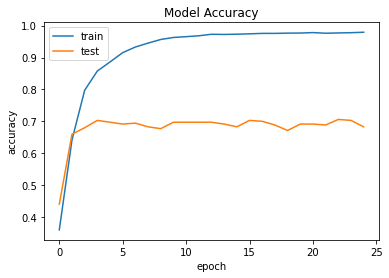

In [58]:
# Answer here
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

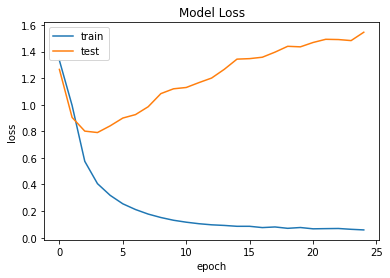

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In terms of experience, changes in learning performance over time. Determine whether a model is underfit, overfit, or well-fit. , To determine if the train and validation datasets are representative of the issue domain, The preceding graphs indicate that this model has an overfitting problem.

The training loss lowers as the number of epochs grows, whereas the validation loss falls at first and subsequently climbs considerably. This is the point in the model where the overfitting issue first appeared.

The accuracy curve shows how accurate the model is. The better the model, the higher the accuracy. The precision of training improves dramatically at first, but subsequently plateaus. The validation accuracy rises at first, but subsequently falls as the number of epochs rises. Overfitting is indicated by a decrease in validation accuracy.


---

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here

There could be several things that could be performed one of could be calculating average vector of all words by using word2vec where the average would be our sentence vector also we could take the vector and multiply it by TFIDF and then take the average also after that using sentence vector as input data to train our model.

There might be ways to get sentence vector more easily maybe just like averaging to all words to get sentence features however which definitely wont be good.


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [76]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]       
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]       
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]       
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]       


target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

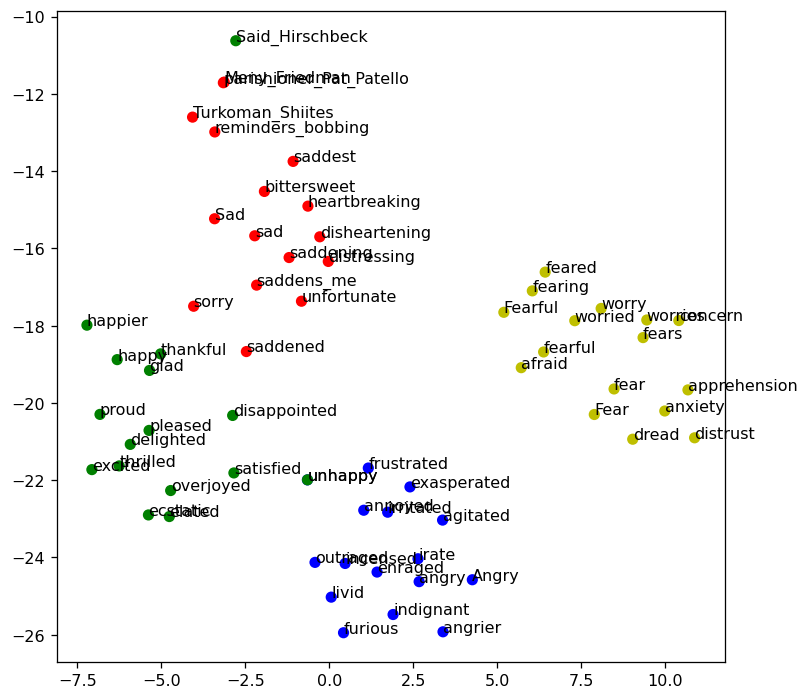

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---